# 2) EDA Notebook
Key Deliverables - By the end of this milestone, should have produced many plots exploring both energy and temperature across different intervals of time as well as a plot relating the two. This last scatter plot just related energy to temperature (not over time) is crucial to building the model in the next phase. You should see something with a pattern like the following Energy and Temp Scatter below.

#### Library Import

In [39]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from os.path import dirname

from IPython.core.display import HTML
HTML("""<style> .output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

#### Load Data

In [54]:
# Point toward data directory
data_directory = dirname(os.getcwd()) + '\\data\\interim'

# Read CSV
train_data = pd.read_csv(data_directory + '\\train_data.csv')
display(train_data.head())

,date,temp,mw,hour,day,weekday,month,year
0,2017-02-01 00:53:00,37.0,1419.881,0,1,2,2,2017
1,2017-02-01 01:53:00,37.0,1379.505,1,1,2,2,2017
2,2017-02-01 02:53:00,36.0,1366.106,2,1,2,2,2017
3,2017-02-01 03:53:00,36.0,1364.453,3,1,2,2,2017
4,2017-02-01 04:53:00,36.0,1391.265,4,1,2,2,2017


## Relationship Between Temperature and Energy
Let's first look at the relationship between Temeperature and Energy Consumption.

#### Temperature vs Energy
One of the immediate insights we can see from plotting temperature vs energy is how this relationship is impacted at the tail ends of temperature. This idea makes sense, as more energy is needed to warm a home when temperatures are very low, and similarily more energy is needed to cool a home on a hot summer day.  

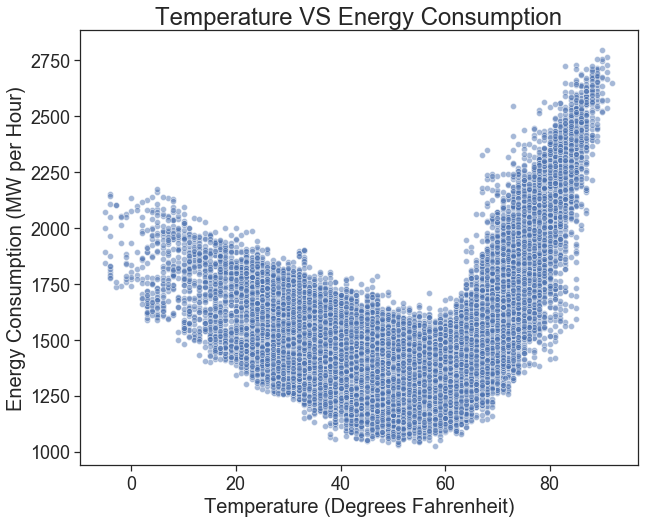

In [55]:
# Setting some stylistic options for matplotlib
fix, ax = plt.subplots( figsize = (10,8))
sns.set(style = 'ticks', rc = {'lines.linewidth':4})

# Create Plot Object
sns.scatterplot(data = train_data, x = 'temp',y = 'mw',alpha = 0.5)

#Managing Axes Labels
plt.xlabel('Temperature (Degrees Fahrenheit)', fontsize = 20)
plt.xticks(fontsize = 18)
plt.ylabel('Energy Consumption (MW per Hour)', fontsize = 20)
plt.yticks(fontsize = 18)

plt.title('Temperature VS Energy Consumption', fontsize = 24)

plt.show()

#### Adding Time Components To This View
Let's layer in some idea of how consumption changes when we incorporate what time of day the reading occured at. 

In [56]:
# Create Time of Day Logic
def day_night(x):
    
    if  0 <= x <= 6:
        return 'Early Morning'
    elif 6 < x <=12:
        return 'Late Morning'
    elif 12 < x <= 18:
        return 'Afteroon'
    elif 18 < x <=24:
        return 'Evening'

# Applying logic defined in above function to our hour column
train_data['time_of_day'] = train_data.hour.apply(day_night)
train_data.head(10)

,date,temp,mw,hour,day,weekday,month,year,time_of_day
0,2017-02-01 00:53:00,37.0,1419.881,0,1,2,2,2017,Early Morning
1,2017-02-01 01:53:00,37.0,1379.505,1,1,2,2,2017,Early Morning
2,2017-02-01 02:53:00,36.0,1366.106,2,1,2,2,2017,Early Morning
3,2017-02-01 03:53:00,36.0,1364.453,3,1,2,2,2017,Early Morning
4,2017-02-01 04:53:00,36.0,1391.265,4,1,2,2,2017,Early Morning
5,2017-02-01 05:53:00,36.0,1477.343,5,1,2,2,2017,Early Morning
6,2017-02-01 06:53:00,34.0,1585.252,6,1,2,2,2017,Early Morning
7,2017-02-01 07:53:00,33.0,1671.412,7,1,2,2,2017,Late Morning
8,2017-02-01 08:53:00,34.0,1708.597,8,1,2,2,2017,Late Morning
9,2017-02-01 09:53:00,35.0,1713.813,9,1,2,2,2017,Late Morning


#### High Consumption Events Occur During Hot Afternoon Days
We can see that our highest energy consumption days are typically hot afternoon days.

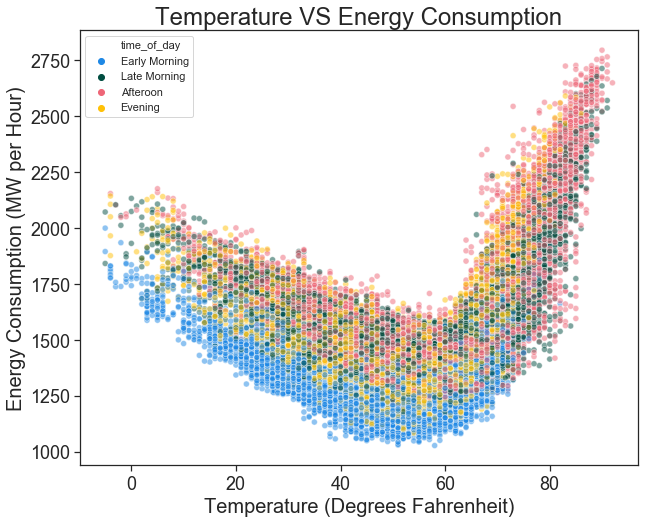

In [64]:
# Setting some stylistic options for matplotlib
fix, ax = plt.subplots( figsize = (10,8))
sns.set(style = 'ticks', rc = {'lines.linewidth':4})

# Create Plot Object
sns.scatterplot(data = train_data, x = 'temp',hue = 'time_of_day',palette = ['#1E88E5','#004D40', '#EE6677','#FFC107'], y = 'mw',alpha = 0.5)

#Managing Axes Labels
plt.xlabel('Temperature (Degrees Fahrenheit)', fontsize = 20)
plt.xticks(fontsize = 18)
plt.ylabel('Energy Consumption (MW per Hour)', fontsize = 20)
plt.yticks(fontsize = 18)

plt.title('Temperature VS Energy Consumption', fontsize = 24)

plt.show()